In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 98% !important }<style>"))

# Analysis

In [2]:
from utilities import *
from models import *

In [3]:
pin_file = "../Data/pin.csv"

pin = read_pin(pin_file)

In [4]:
filename = "../Data/rssi5.csv"
B1 = "0117C55D14E4"

data = read_data(filename, B1)

All beacons: ['0117C55D14E4']
Selecting 0117C55D14E4


In [5]:
data[scanners] = minMaxScaling(data[scanners])

In [6]:
data.describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
count,3219.000000,3140.000000,2388.000000,3396.000000,3168.000000,3347.000000,3461.000000,3819.000000,4928.000000,2340.000000,3180.000000,3074.000000,3378.000000,3859.000000,3303.000000,2179.000000,3539.000000
mean,0.438490,0.402463,0.354355,0.426232,0.437463,0.425197,0.421501,0.427935,0.419207,0.368105,0.387825,0.468933,0.499724,0.372234,0.420169,0.296665,0.402562
std,0.151902,0.130322,0.120450,0.142455,0.114273,0.156658,0.155481,0.146579,0.196955,0.179789,0.184707,0.130727,0.130346,0.153890,0.143028,0.135034,0.135141
min,0.050000,0.033333,0.050000,0.033333,0.050000,0.033333,0.050000,0.050000,0.033333,0.033333,0.033333,0.066667,0.066667,0.033333,0.033333,0.033333,0.033333
25%,0.333333,0.300000,0.266667,0.329167,0.366667,0.300000,0.283333,0.300000,0.283333,0.216667,0.216667,0.383333,0.416667,0.216667,0.316667,0.183333,0.300000
50%,0.466667,0.416667,0.350000,0.416667,0.450000,0.450000,0.416667,0.450000,0.416667,0.333333,0.400000,0.466667,0.500000,0.416667,0.416667,0.283333,0.416667
75%,0.533333,0.516667,0.450000,0.550000,0.533333,0.550000,0.550000,0.550000,0.516667,0.533333,0.550000,0.550000,0.600000,0.516667,0.516667,0.416667,0.516667
max,0.733333,0.616667,0.600000,0.700000,0.683333,0.750000,0.783333,0.650000,0.850000,0.700000,0.800000,0.750000,0.766667,0.633333,0.733333,0.566667,0.666667


## Train Validation Test Split

In [7]:
train, validation, test = train_validation_test_split(data)

In [8]:
train.groupby("location")[scanners].count()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
location,,,,,,,,,,,,,,,,,
V1_10,204,101,81,194,172,80,73,258,0,166,89,119,194,300,146,4,218
V1_11,49,64,74,92,117,81,60,87,110,43,55,135,123,27,38,24,78
V1_12,68,79,56,91,82,85,52,55,161,48,64,155,120,81,103,53,71
V1_13,70,139,56,108,43,88,97,109,258,10,43,118,85,84,148,12,59
V1_14,29,146,38,79,57,91,248,65,203,16,113,44,82,95,161,70,88
V1_18,53,22,49,82,40,31,28,222,2,63,35,54,55,210,23,0,157
V1_19,291,88,81,152,246,75,59,289,36,131,46,138,245,272,102,92,208
V1_20,112,110,92,73,121,83,66,80,80,32,68,86,160,15,88,23,66
V1_21,66,143,70,71,98,87,132,53,149,21,96,97,85,61,82,67,63


In [9]:
train.shape

(29797, 19)

In [10]:
validation.shape

(9933, 19)

In [11]:
train.sort_values("time", inplace=True)
validation.sort_values("time", inplace=True)
test.sort_values("time", inplace=True)

In [12]:
train_rolled = train.groupby("location").rolling(30, min_periods=1).mean().reset_index()
validation_rolled = validation.groupby("location").rolling(30, min_periods=1).mean().reset_index()
test_rolled = test.groupby("location").rolling(30, min_periods=1).mean().reset_index()

In [13]:
train_rolled

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_10,30171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN
1,V1_10,30172,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN
2,V1_10,30173,0.533333,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN
3,V1_10,30177,0.533333,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,0.183333,NaN,0.566667,NaN,NaN,NaN,NaN
4,V1_10,30179,0.533333,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,0.316667,0.183333,NaN,0.566667,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29792,V1_9,43166,0.433333,0.283333,0.366667,0.613333,0.483333,NaN,NaN,0.591667,NaN,0.166667,0.225000,0.561111,0.350000,0.475,NaN,0.133333,0.366667
29793,V1_9,43167,0.433333,0.283333,0.366667,0.613333,0.483333,NaN,NaN,0.622222,NaN,0.166667,0.225000,0.561111,0.350000,0.475,NaN,0.125000,0.366667
29794,V1_9,43168,0.433333,0.283333,0.366667,0.613333,0.483333,NaN,NaN,0.622222,NaN,0.166667,0.183333,0.561111,0.400000,0.475,NaN,0.125000,0.366667
29795,V1_9,43169,0.433333,0.283333,0.366667,0.613333,0.483333,NaN,NaN,0.622222,NaN,0.166667,0.183333,0.561111,0.400000,0.475,NaN,0.125000,0.366667


## Imputation
1. Forward fill
2. Fill NaN

In [14]:
train_imputed = train_rolled.set_index("location").groupby("location").ffill()
train_imputed.fillna(0, inplace=True)
train_imputed.reset_index(inplace=True)

In [15]:
validation_imputed = validation_rolled.set_index("location").groupby("location").ffill()
validation_imputed.fillna(0, inplace=True)
validation_imputed.reset_index(inplace=True)

In [16]:
test_imputed = test_rolled.set_index("location").groupby("location").ffill()
test_imputed.fillna(0, inplace=True)
test_imputed.reset_index(inplace=True)

## Change Location to Coordinates

In [17]:
train_imputed["X"] = train_imputed["location"].apply(lambda x: pin[x]["X"])
train_imputed["Y"] = train_imputed["location"].apply(lambda x: pin[x]["Y"])

In [18]:
validation_imputed["X"] = validation_imputed["location"].apply(lambda x: pin[x]["X"])
validation_imputed["Y"] = validation_imputed["location"].apply(lambda x: pin[x]["Y"])

In [19]:
test_imputed["X"] = test_imputed["location"].apply(lambda x: pin[x]["X"])
test_imputed["Y"] = test_imputed["location"].apply(lambda x: pin[x]["Y"])

## Model Training

In [20]:
X_train, y_train = train_imputed[scanners].values, train_imputed[["X", "Y"]].values
X_validation, y_validation = validation_imputed[scanners].values, validation_imputed[["X", "Y"]].values
X_test, y_test = test_imputed[scanners].values, test_imputed[["X", "Y"]].values

In [21]:
model = MLPRegressor(size='small')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1152      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(X_train, y_train, X_validation, y_validation)

Train on 29797 samples, validate on 9933 samples
Epoch 1/1000
29797/29797 [==============================] - 2s 59us/sample - loss: 29.5782 - mae: 3.4209 - mse: 29.2482 - val_loss: 5.0114 - val_mae: 1.6525 - val_mse: 4.6093
Epoch 2/1000
29797/29797 [==============================] - 1s 34us/sample - loss: 3.0488 - mae: 1.2495 - mse: 2.6242 - val_loss: 3.2301 - val_mae: 1.2259 - val_mse: 2.7974
Epoch 3/1000
29797/29797 [==============================] - 1s 32us/sample - loss: 2.2693 - mae: 1.0367 - mse: 1.8309 - val_loss: 2.5106 - val_mae: 1.0486 - val_mse: 2.0683
Epoch 4/1000
29797/29797 [==============================] - 1s 35us/sample - loss: 1.9405 - mae: 0.9215 - mse: 1.4881 - val_loss: 2.2879 - val_mae: 0.9755 - val_mse: 1.8326
Epoch 5/1000
29797/29797 [==============================] - 1s 32us/sample - loss: 1.7785 - mae: 0.8548 - mse: 1.3148 - val_loss: 2.1803 - val_mae: 0.9279 - val_mse: 1.7112
Epoch 6/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 1

Epoch 48/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.9711 - mae: 0.4835 - mse: 0.4598 - val_loss: 1.4721 - val_mae: 0.6672 - val_mse: 0.9668
Epoch 49/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.9668 - mae: 0.4809 - mse: 0.4561 - val_loss: 1.4331 - val_mae: 0.6317 - val_mse: 0.9202
Epoch 50/1000
29797/29797 [==============================] - 1s 32us/sample - loss: 0.9630 - mae: 0.4796 - mse: 0.4523 - val_loss: 1.5230 - val_mae: 0.6842 - val_mse: 1.0007
Epoch 51/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.9602 - mae: 0.4778 - mse: 0.4500 - val_loss: 1.4175 - val_mae: 0.6284 - val_mse: 0.9082
Epoch 52/1000
29797/29797 [==============================] - 1s 29us/sample - loss: 0.9582 - mae: 0.4765 - mse: 0.4483 - val_loss: 1.4572 - val_mae: 0.6406 - val_mse: 0.9390
Epoch 53/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.9527 - mae: 0.4739 - mse: 0.4431 - val_loss:

29797/29797 [==============================] - 1s 29us/sample - loss: 0.8615 - mae: 0.4255 - mse: 0.3617 - val_loss: 1.4153 - val_mae: 0.6471 - val_mse: 0.8979
Epoch 96/1000
29797/29797 [==============================] - 1s 32us/sample - loss: 0.8599 - mae: 0.4248 - mse: 0.3604 - val_loss: 1.3126 - val_mae: 0.6034 - val_mse: 0.8251
Epoch 97/1000
29797/29797 [==============================] - 1s 36us/sample - loss: 0.8584 - mae: 0.4239 - mse: 0.3591 - val_loss: 1.3826 - val_mae: 0.6218 - val_mse: 0.8677
Epoch 98/1000
29797/29797 [==============================] - 1s 30us/sample - loss: 0.8558 - mae: 0.4222 - mse: 0.3567 - val_loss: 1.2940 - val_mae: 0.5867 - val_mse: 0.7983
Epoch 99/1000
29797/29797 [==============================] - 1s 29us/sample - loss: 0.8551 - mae: 0.4214 - mse: 0.3562 - val_loss: 1.3460 - val_mae: 0.6068 - val_mse: 0.8359
Epoch 100/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.8532 - mae: 0.4213 - mse: 0.3545 - val_loss: 1.2967 - val

Epoch 142/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.8082 - mae: 0.3949 - mse: 0.3163 - val_loss: 1.3020 - val_mae: 0.6153 - val_mse: 0.8225
Epoch 143/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.8093 - mae: 0.3950 - mse: 0.3174 - val_loss: 1.2421 - val_mae: 0.5632 - val_mse: 0.7550
Epoch 144/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.8073 - mae: 0.3939 - mse: 0.3157 - val_loss: 1.4025 - val_mae: 0.6492 - val_mse: 0.8914
Epoch 145/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.8071 - mae: 0.3940 - mse: 0.3155 - val_loss: 1.2573 - val_mae: 0.5730 - val_mse: 0.7647
Epoch 146/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.8054 - mae: 0.3937 - mse: 0.3139 - val_loss: 1.2542 - val_mae: 0.5601 - val_mse: 0.7606
Epoch 147/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.8055 - mae: 0.3933 - mse: 0.3142 - val

Epoch 189/1000
29797/29797 [==============================] - 1s 30us/sample - loss: 0.7763 - mae: 0.3751 - mse: 0.2899 - val_loss: 1.2165 - val_mae: 0.5382 - val_mse: 0.7281
Epoch 190/1000
29797/29797 [==============================] - 1s 32us/sample - loss: 0.7752 - mae: 0.3740 - mse: 0.2889 - val_loss: 1.2494 - val_mae: 0.5595 - val_mse: 0.7547
Epoch 191/1000
29797/29797 [==============================] - 1s 35us/sample - loss: 0.7742 - mae: 0.3735 - mse: 0.2881 - val_loss: 1.2392 - val_mae: 0.5509 - val_mse: 0.7452
Epoch 192/1000
29797/29797 [==============================] - 1s 29us/sample - loss: 0.7737 - mae: 0.3732 - mse: 0.2876 - val_loss: 1.2668 - val_mae: 0.5686 - val_mse: 0.7705
Epoch 193/1000
29797/29797 [==============================] - 1s 29us/sample - loss: 0.7742 - mae: 0.3732 - mse: 0.2882 - val_loss: 1.2178 - val_mae: 0.5471 - val_mse: 0.7345
Epoch 194/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7729 - mae: 0.3729 - mse: 0.2871 - val

Epoch 236/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7513 - mae: 0.3588 - mse: 0.2691 - val_loss: 1.2286 - val_mae: 0.5620 - val_mse: 0.7548
Epoch 237/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7514 - mae: 0.3589 - mse: 0.2693 - val_loss: 1.2973 - val_mae: 0.5894 - val_mse: 0.7991
Epoch 238/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7515 - mae: 0.3593 - mse: 0.2694 - val_loss: 1.2678 - val_mae: 0.5692 - val_mse: 0.7738
Epoch 239/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7494 - mae: 0.3578 - mse: 0.2674 - val_loss: 1.2690 - val_mae: 0.5762 - val_mse: 0.7754
Epoch 240/1000
29797/29797 [==============================] - 1s 29us/sample - loss: 0.7507 - mae: 0.3583 - mse: 0.2689 - val_loss: 1.2569 - val_mae: 0.5750 - val_mse: 0.7790
Epoch 241/1000
29797/29797 [==============================] - 1s 36us/sample - loss: 0.7493 - mae: 0.3576 - mse: 0.2675 - val

Epoch 283/1000
29797/29797 [==============================] - 1s 29us/sample - loss: 0.7339 - mae: 0.3481 - mse: 0.2561 - val_loss: 1.2881 - val_mae: 0.6241 - val_mse: 0.8278
Epoch 284/1000
29797/29797 [==============================] - 1s 30us/sample - loss: 0.7334 - mae: 0.3479 - mse: 0.2556 - val_loss: 1.1909 - val_mae: 0.5274 - val_mse: 0.7118
Epoch 285/1000
29797/29797 [==============================] - 1s 35us/sample - loss: 0.7325 - mae: 0.3475 - mse: 0.2548 - val_loss: 1.3918 - val_mae: 0.6550 - val_mse: 0.8920
Epoch 286/1000
29797/29797 [==============================] - 1s 39us/sample - loss: 0.7321 - mae: 0.3472 - mse: 0.2543 - val_loss: 1.1976 - val_mae: 0.5427 - val_mse: 0.7283
Epoch 287/1000
29797/29797 [==============================] - 1s 40us/sample - loss: 0.7327 - mae: 0.3479 - mse: 0.2551 - val_loss: 1.2892 - val_mae: 0.5888 - val_mse: 0.7976
Epoch 288/1000
29797/29797 [==============================] - 1s 34us/sample - loss: 0.7318 - mae: 0.3470 - mse: 0.2542 - val

Epoch 330/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7200 - mae: 0.3392 - mse: 0.2457 - val_loss: 1.2033 - val_mae: 0.5327 - val_mse: 0.7218
Epoch 331/1000
29797/29797 [==============================] - 1s 29us/sample - loss: 0.7193 - mae: 0.3388 - mse: 0.2451 - val_loss: 1.1984 - val_mae: 0.5349 - val_mse: 0.7217
Epoch 332/1000
29797/29797 [==============================] - 1s 29us/sample - loss: 0.7185 - mae: 0.3381 - mse: 0.2444 - val_loss: 1.3599 - val_mae: 0.6295 - val_mse: 0.8664
Epoch 333/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7182 - mae: 0.3382 - mse: 0.2441 - val_loss: 1.1833 - val_mae: 0.5238 - val_mse: 0.7073
Epoch 334/1000
29797/29797 [==============================] - 1s 34us/sample - loss: 0.7180 - mae: 0.3381 - mse: 0.2440 - val_loss: 1.2002 - val_mae: 0.5594 - val_mse: 0.7368
Epoch 335/1000
29797/29797 [==============================] - 1s 39us/sample - loss: 0.7179 - mae: 0.3378 - mse: 0.2440 - val

Epoch 377/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7058 - mae: 0.3292 - mse: 0.2343 - val_loss: 1.2676 - val_mae: 0.5723 - val_mse: 0.7800
Epoch 378/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7050 - mae: 0.3294 - mse: 0.2334 - val_loss: 1.3452 - val_mae: 0.6301 - val_mse: 0.8569
Epoch 379/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7049 - mae: 0.3286 - mse: 0.2335 - val_loss: 1.2695 - val_mae: 0.6122 - val_mse: 0.8086
Epoch 380/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7042 - mae: 0.3288 - mse: 0.2328 - val_loss: 1.1516 - val_mae: 0.5101 - val_mse: 0.6826
Epoch 381/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7043 - mae: 0.3288 - mse: 0.2330 - val_loss: 1.3428 - val_mae: 0.6260 - val_mse: 0.8530
Epoch 382/1000
29797/29797 [==============================] - 1s 29us/sample - loss: 0.7035 - mae: 0.3279 - mse: 0.2322 - val

Epoch 424/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6939 - mae: 0.3222 - mse: 0.2248 - val_loss: 1.1983 - val_mae: 0.5300 - val_mse: 0.7216
Epoch 425/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6937 - mae: 0.3215 - mse: 0.2247 - val_loss: 1.1775 - val_mae: 0.5203 - val_mse: 0.7016
Epoch 426/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6935 - mae: 0.3214 - mse: 0.2245 - val_loss: 1.1641 - val_mae: 0.5300 - val_mse: 0.7030
Epoch 427/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6929 - mae: 0.3210 - mse: 0.2241 - val_loss: 1.1657 - val_mae: 0.5283 - val_mse: 0.7023
Epoch 428/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6932 - mae: 0.3216 - mse: 0.2245 - val_loss: 1.2706 - val_mae: 0.5805 - val_mse: 0.7872
Epoch 429/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6931 - mae: 0.3205 - mse: 0.2244 - val

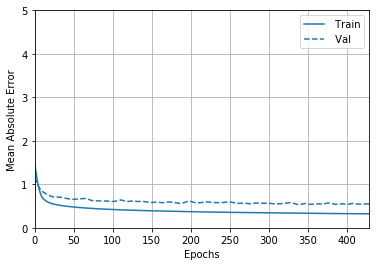

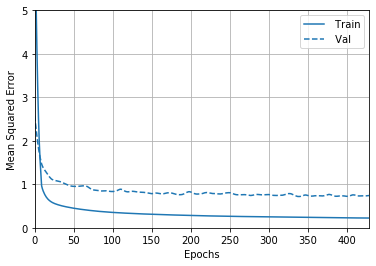

In [23]:
model.show_history()

## Model Validation

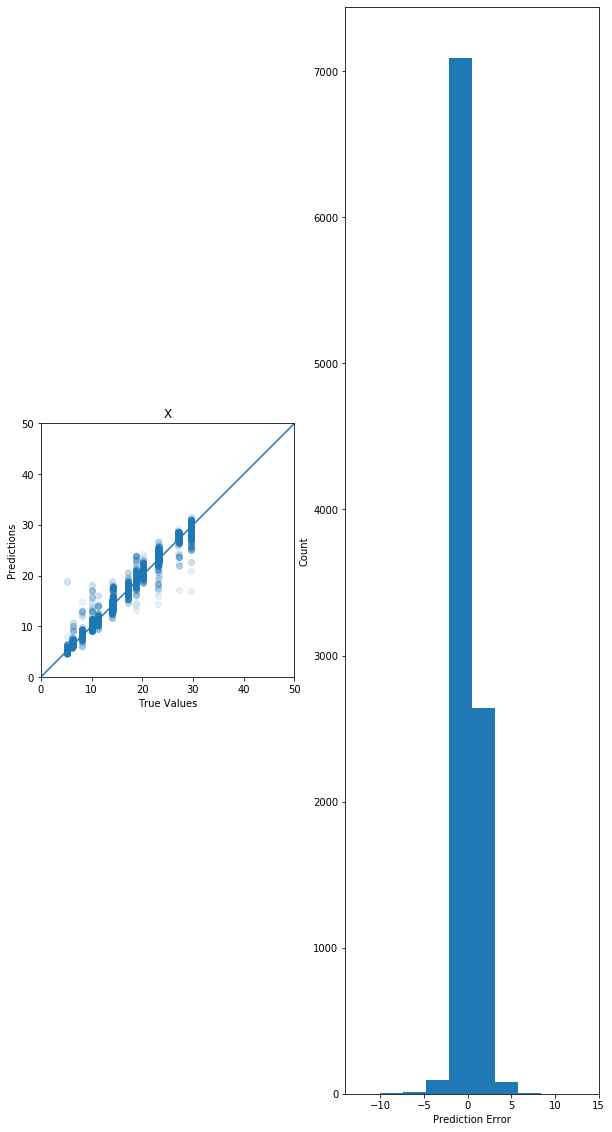

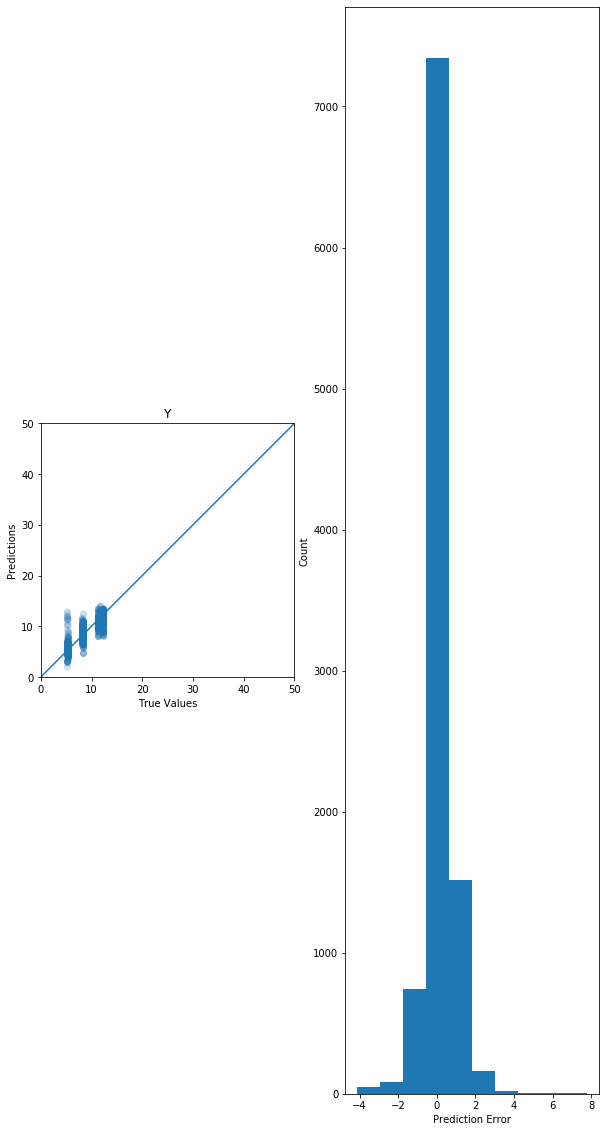

In [24]:
model.model_validation(X_validation, y_validation)

## Model Testing

In [25]:
model.model_testing(X_test, y_test)

9933/1 - 0s - loss: 0.6734 - mae: 0.4850 - mse: 0.7076
Test loss: 1.1833212731105496
Mean absolute error: 0.48497137
Mean squared error: 0.70759225


In [26]:
model.save('../Models/Small_MLP_Regression_Rolling_FFill_MinMax.h5')

## Plotting Learning Curves

train_loss = []
val_loss = []

for f in range(1, 11, 1):
    frac = f / 10.0
    sample = data.sample(frac=frac, random_state=12345)
    train, validation, test = train_validation_test_split(sample)

    train.sort_values("time", inplace=True)
    validation.sort_values("time", inplace=True)
    test.sort_values("time", inplace=True)

    train_rolled = train.groupby("location").rolling(15, min_periods=1).mean().reset_index()
    validation_rolled = validation.groupby("location").rolling(15, min_periods=1).mean().reset_index()
    test_rolled = test.groupby("location").rolling(15, min_periods=1).mean().reset_index()

    train_imputed = train_rolled.set_index("location").groupby("location").ffill()
    train_imputed.fillna(0, inplace=True)
    train_imputed.reset_index(inplace=True)

    validation_imputed = validation_rolled.set_index("location").groupby("location").ffill()
    validation_imputed.fillna(0, inplace=True)
    validation_imputed.reset_index(inplace=True)

    test_imputed = test_rolled.set_index("location").groupby("location").ffill()
    test_imputed.fillna(0, inplace=True)
    test_imputed.reset_index(inplace=True)

    train_imputed["X"] = train_imputed["location"].apply(lambda x: pin[x]["X"])
    train_imputed["Y"] = train_imputed["location"].apply(lambda x: pin[x]["Y"])

    validation_imputed["X"] = validation_imputed["location"].apply(lambda x: pin[x]["X"])
    validation_imputed["Y"] = validation_imputed["location"].apply(lambda x: pin[x]["Y"])

    test_imputed["X"] = test_imputed["location"].apply(lambda x: pin[x]["X"])
    test_imputed["Y"] = test_imputed["location"].apply(lambda x: pin[x]["Y"])

    X_train, y_train = train_imputed[scanners].values, train_imputed[["X", "Y"]].values
    X_validation, y_validation = validation_imputed[scanners].values, validation_imputed[["X", "Y"]].values
    X_test, y_test = test_imputed[scanners].values, test_imputed[["X", "Y"]].values

    model = MLPRegressor()

    history = model.fit(X_train, y_train, X_validation, y_validation)
    train_loss.append(history.history['loss'][-1])
    val_loss.append(history.history['val_loss'][-1])

x = np.arange(10)
plt.plot(x, train_loss, label='Training loss')
plt.plot(x, val_loss, label='Validation loss')
plt.legend()
plt.xlabel("Dataset size")
plt.ylabel("Loss")
plt.show()